# Feature Engineering

In [35]:
dff=df4.copy()

## Drop Label

In [36]:
training = dff.drop("price", axis=1) # drop labels for training set
training_labels = dff["price"].copy()

In [37]:
training.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2762,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2976,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,3021,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,2793,0.10,1,0


In [38]:
training_labels.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

## Categorical Variables

In [39]:
df5=training.copy()

In [40]:
#Get list of categorical variables
s = (df5.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['neighbourhood_group', 'neighbourhood', 'room_type']


In [41]:
#number of unique values in each categorical column
df5[object_cols].nunique(axis=0)

neighbourhood_group      5
neighbourhood          221
room_type                3
dtype: int64

Check to see if any of them need grouping

In [42]:
print(df5['neighbourhood_group'].value_counts())

Manhattan        21645
Brooklyn         20097
Queens            5657
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [43]:
print(df5['room_type'].value_counts())

Entire home/apt    25396
Private room       22308
Shared room         1159
Name: room_type, dtype: int64


In [44]:
pd.set_option('display.max_rows', 500)
print(df5['neighbourhood'].value_counts())

Williamsburg                  3918
Bedford-Stuyvesant            3713
Harlem                        2653
Bushwick                      2465
Upper West Side               1970
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1563
Midtown                       1545
East Harlem                   1116
Greenpoint                    1114
Chelsea                       1113
Lower East Side                908
Washington Heights             899
Astoria                        899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   571
Prospect-Lefferts Gardens      535
Long Island City               535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgewood           

Change Neighbourhood with less than 40 frequencies to "Other"

In [45]:
df6=df5.copy()
df66=df6['neighbourhood']
pd.set_option('display.max_rows', 60)
neighbourhood_freq = (df66.value_counts())
#bottom_decile = neighbourhood_freq.quantile(q=0.1)
#less_freq_neighbourhood = neighbourhood_freq[neighbourhood_freq<=bottom_decile]
less_freq_neighbourhood_40 = neighbourhood_freq[neighbourhood_freq<=40]
df66.loc[df66.isin(less_freq_neighbourhood_40.index.tolist())] = "Other_40"
df6['neighbourhood']=df66
print(df6['neighbourhood'].value_counts())


Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2653
Bushwick              2465
Upper West Side       1970
                      ... 
St. George              48
Port Morris             46
Columbia St             42
Allerton                42
Tompkinsville           42
Name: neighbourhood, Length: 104, dtype: int64


In [46]:
df6[object_cols].nunique(axis=0)

neighbourhood_group      5
neighbourhood          104
room_type                3
dtype: int64

One_Hot encoding for all categorical features

In [47]:
categorical_features = df6.select_dtypes(include=['object'])
numerical_features =  df6.select_dtypes(exclude=['object'])
df6_cat=pd.get_dummies(categorical_features)
df6_cat.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,...,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
df7= pd.concat([numerical_features, df6_cat], axis=1)
df7.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,...,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,40.64749,-73.97237,1,9,2762,0.21,6,365,0,...,0,0,0,0,0,0,0,0,1,0
1,2845,40.75362,-73.98377,1,45,2976,0.38,2,355,0,...,0,0,0,0,0,0,0,1,0,0
2,4632,40.80902,-73.94190,3,0,0,0.00,1,365,0,...,0,0,0,0,0,0,0,0,1,0
3,4869,40.68514,-73.95976,1,270,3021,4.64,1,194,0,...,0,0,0,0,0,0,0,1,0,0
4,7192,40.79851,-73.94399,10,9,2793,0.10,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Numerical Variables

In [49]:
df8=df7.copy()

In [50]:
df8.drop(['host_id','latitude','longitude'], axis=1, inplace=True)

In [51]:
numerical_features =  df8.select_dtypes(exclude=['object','uint8']) #unit8 for one-hot encoding
categorical_features =  df8.select_dtypes(include=['uint8'])
df9=numerical_features.copy()

We apply transformation and scaling on numerical variables.

### Transformation

In [52]:
df_scew=df9.copy()

In [53]:
from scipy import stats
def skewness(df_,x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_[x], ax=ax[0,0])
    ax[0, 0].set_title('No Transformation')
    sns.distplot(np.log(df_[x]+1), ax=ax[0,1])
    ax[0, 1].set_title('Log Transformation')
    sns.distplot(np.sqrt(df_[x]), ax=ax[1,0])
    ax[1,0].set_title('Sqrt Transformation')
    sns.distplot(stats.boxcox(df_[x]+1)[0], ax=ax[1,1])
    ax[1,1].set_title('Box Cox Transformation')
    plt.tight_layout()
    plt.show()
    
    print(x,'Without Transform: ',df_[x].skew().round(2))
    print(x,'Log Transform: ',np.log(df_[x]+1).skew().round(2))
    print(x,'SQRT Transform: ',np.sqrt(df_[x]).skew().round(2))
    print(x,'BoxCox Transform: ',pd.Series(stats.boxcox(df_[x]+1)[0]).skew().round(2),'\n')

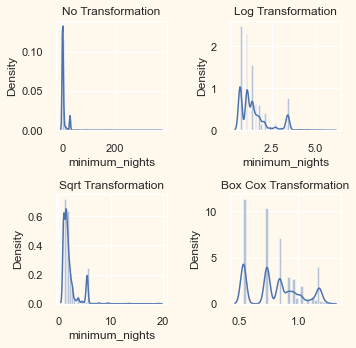

minimum_nights Without Transform:  11.71
minimum_nights Log Transform:  1.47
minimum_nights SQRT Transform:  3.26
minimum_nights BoxCox Transform:  0.27 



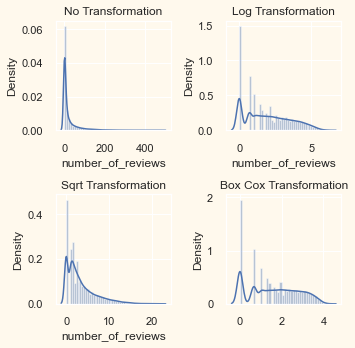

number_of_reviews Without Transform:  3.51
number_of_reviews Log Transform:  0.36
number_of_reviews SQRT Transform:  1.47
number_of_reviews BoxCox Transform:  0.08 



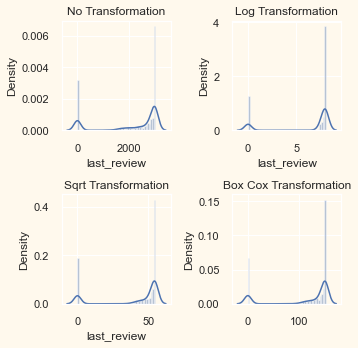

last_review Without Transform:  -1.17
last_review Log Transform:  -1.45
last_review SQRT Transform:  -1.35
last_review BoxCox Transform:  -1.33 



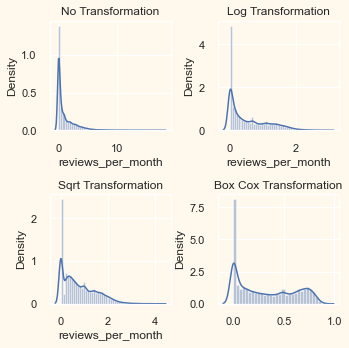

reviews_per_month Without Transform:  2.29
reviews_per_month Log Transform:  0.94
reviews_per_month SQRT Transform:  0.79
reviews_per_month BoxCox Transform:  0.32 



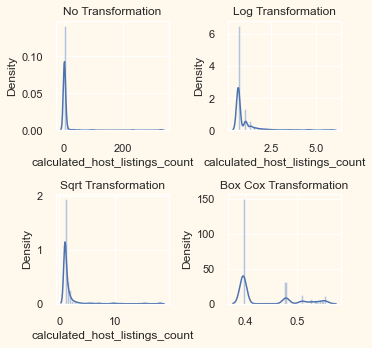

calculated_host_listings_count Without Transform:  7.93
calculated_host_listings_count Log Transform:  3.28
calculated_host_listings_count SQRT Transform:  5.52
calculated_host_listings_count BoxCox Transform:  0.97 



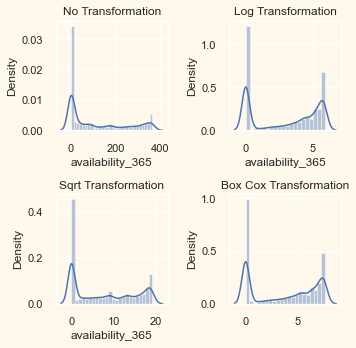

availability_365 Without Transform:  0.76
availability_365 Log Transform:  -0.2
availability_365 SQRT Transform:  0.28
availability_365 BoxCox Transform:  -0.12 



In [54]:
for i in df_scew.columns:
    skewness(df_scew,i)

In [55]:
df_transform = pd.DataFrame(index=df_scew.index)
for i in df_scew.columns:
    df_transform[i] = stats.boxcox(df_scew[i]+1)[0]
df_transform.head()

,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0.533013,1.979244,145.229618,0.172474,0.538853,7.625239
1,0.533013,2.990135,151.452207,0.272541,0.478679,7.579981
2,0.840353,0.000000,0.000000,0.000000,0.396026,7.625239
3,0.533013,3.931066,152.735101,0.788878,0.396026,6.621978
4,1.071509,1.979244,146.143960,0.090621,0.396026,0.000000


### Scaling

In [56]:
df10=df_transform.copy()

In [57]:
scaler = StandardScaler()

# Create a pandas DataFrame
df_normalized = pd.DataFrame(data=scaler.fit_transform(df10), index=df10.index, columns=df10.columns)
df_normalized.head()

,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,-1.288673,0.304872,0.514049,-0.536035,1.806717,1.248265
1,-1.288673,1.166804,0.618618,-0.182448,0.758092,1.233797
2,0.174179,-1.382724,-1.926512,-1.145472,-0.682248,1.248265
3,-1.288673,1.969086,0.640177,1.642037,-0.682248,0.927540
4,1.274415,0.304872,0.529414,-0.825262,-0.682248,-1.189389


Add categorical features:

In [58]:
df_ready= pd.concat([df_normalized, categorical_features], axis=1)
df_ready.head()

,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-1.288673,0.304872,0.514049,-0.536035,1.806717,1.248265,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.288673,1.166804,0.618618,-0.182448,0.758092,1.233797,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.174179,-1.382724,-1.926512,-1.145472,-0.682248,1.248265,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-1.288673,1.969086,0.640177,1.642037,-0.682248,0.927540,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.274415,0.304872,0.529414,-0.825262,-0.682248,-1.189389,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
